In [33]:
from red_gym_env import *
import stable_baselines3
from stable_baselines3.common.utils import set_random_seed
import uuid

sess_path = Path(f'session_{str(uuid.uuid4())[:8]}')
ep_length = 2**23
env_config = {
            'headless': False, 'save_final_state': True, 'early_stop': False,
            'action_freq': 24, 'init_state': '../has_pokedex_nballs.state', 'max_steps': ep_length, 
            'print_rewards': True, 'save_video': False, 'fast_video': True, 'session_path': sess_path,
            'gb_path': '../PokemonRed.gb', 'debug': False, 'sim_frame_dist': 2_000_000.0, 'extra_buttons': True
        }


    
def make_env(env_conf, seed=0):
    def _init():
        env = RedGymEnv(env_conf)
        return env
    set_random_seed(seed)
    return _init

env_func = make_env(env_config)

In [34]:
env = env_func()
obs, info = env.reset()
n_step = 0
while n_step<=10:
    action = 7 # pass action
    obs, rewards, terminated, truncated, info = env.step(action)
    # env.render()
    n_step += 1
    
env.close()

10799057 pyboy.pyboy                    WARNING  The emulation speed might not be accurate when speed-target is higher than 5


step:     10 event:  0.00 level:  0.00 heal:  0.00 op_lvl:  0.00 dead: -0.00 badge:  0.00 explore:  0.01 sum:  0.01

In [35]:
print('Initial State is loaded by PyBoy emulator, represents a specific game state')
print('-- If only we can save a game state & load it ourselves..')
env.init_state

Initial State is loaded by PyBoy emulator, represents a specific game state
-- If only we can save a game state & load it ourselves..


'../has_pokedex_nballs.state'

How Ugly is this observation windows? So many redundancy inside ...


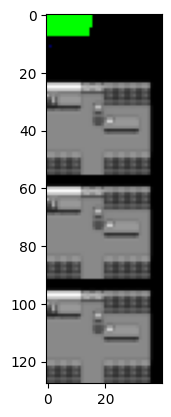

In [36]:
import matplotlib.pyplot as plt
plt.imshow(obs)
print('How Ugly is this observation windows? So many redundancy inside ...')

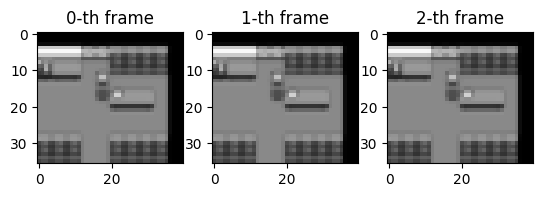

In [37]:
recent_frames = env.recent_frames
fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].imshow(recent_frames[i])
    axes[i].set_title(f'{i}-th frame')

In [45]:
env.agent_stats[0]
print('Initial State of Agent is given here')
print('Combining the information page with LLM, maybe we could ask the LLM to design some basic strategy, such as pick the move with maximal damage points')
whether_in_battle = env.read_m(0xD057)
type_of_battle = env.read_m(0xD05A)
env.read_m(0xD173)

Initial State of Agent is given here
Combining the information page with LLM, maybe we could ask the LLM to design some basic strategy, such as pick the move with maximal damage points


33

In [9]:
import hnswlib
import numpy as np

# Create an HNSW index for 2-dimensional vectors
dim = 2
index = hnswlib.Index(space='l2', dim=dim)

# Initialize the index to hold up to 10 elements
index.init_index(max_elements=10, ef_construction=200, M=16)

# Add items to the index
p1 = np.array([0.1, 0.1])
p2 = np.array([0.6, 0.8])
p3 = np.array([1.0, 2.0])
index.add_items(p1, index.get_current_count())
index.add_items(p2, index.get_current_count())
index.add_items(p3, index.get_current_count())

# Create a query point
query_point = np.array([[0.1, 0.2]])  # 2D array

# Perform the query for the nearest neighbor
labels, distances = index.knn_query(query_point, k=1)

# labels and distances now contain the results of the query
for i in range(11):
    print('i = ', i)
    index.add_items(p1)

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7


RuntimeError: The number of elements exceeds the specified limit

In [5]:
distances, labels

(array([[0.01]], dtype=float32), array([[0]], dtype=uint64))

In [8]:
distances[0][0]

0.010000001

In [8]:
obs.shape
import numpy as np
np.prod(obs.shape)

15360

In [11]:
obs.shape

(128, 40, 3)

In [13]:
4320/40/36

3.0

In [10]:
obs.shape[0] * obs.shape[1]

5120

In [ ]:
from pyboy import PyBoy

# Initialize PyBoy with a ROM file
pyboy = PyBoy('path/to/game.rom')

# Start the emulator (necessary before saving state)
pyboy.start()

# ... Play the game or do whatever you need ...

# Save the current state to a file
pyboy.save_state('path/to/savefile.state')

# Stop the PyBoy instance
pyboy.stop()


In [21]:
import numpy as np
arr = np.array([[0.,1.,2.],[2.,3.,4.],[3.,4.,5.]])
arr

array([[0., 1., 2.],
       [2., 3., 4.],
       [3., 4., 5.]])

In [24]:
np.roll(arr, 1, axis=0)

array([[3., 4., 5.],
       [0., 1., 2.],
       [2., 3., 4.]])

In [30]:
np.roll(arr, 3)

array([[3., 4., 5.],
       [0., 1., 2.],
       [2., 3., 4.]])